<a href="https://colab.research.google.com/github/lhiwi/DNN-Activation-Functions-and-Depth-Analysis/blob/main/Breast_cancer_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LeakyReLU, PReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, sigmoid, tanh


In [ ]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = malignant, 1 = benign

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
def create_dnn(activation, depth=3):  # default to 3 layers
    model = Sequential()
    model.add(Input(shape=(x_train.shape[1],)))

    for _ in range(depth):
        if activation == 'LeakyReLU':
            model.add(Dense(64))
            model.add(LeakyReLU())
        elif activation == 'PReLU':
            model.add(Dense(64))
            model.add(PReLU())
        else:
            model.add(Dense(64, activation=activation))

    model.add(Dense(1, activation='sigmoid'))  # Binary output

    model.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


In [ ]:
activations = {
    'Sigmoid': 'sigmoid',
    'Tanh': 'tanh',
    'ReLU': 'relu',
    'LeakyReLU': 'LeakyReLU',
    'PReLU': 'PReLU'
}

results = {}
for name, activation in activations.items():
    print(f"Training with {name} activation...")
    model = create_dnn(activation)
    history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), verbose=0)
    results[name] = history.history

Training with Sigmoid activation...
Training with Tanh activation...
Training with ReLU activation...
Training with LeakyReLU activation...
Training with PReLU activation...


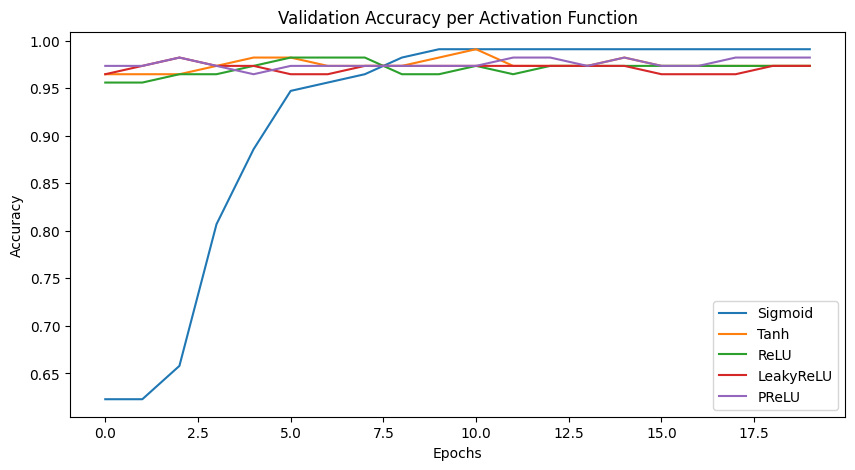

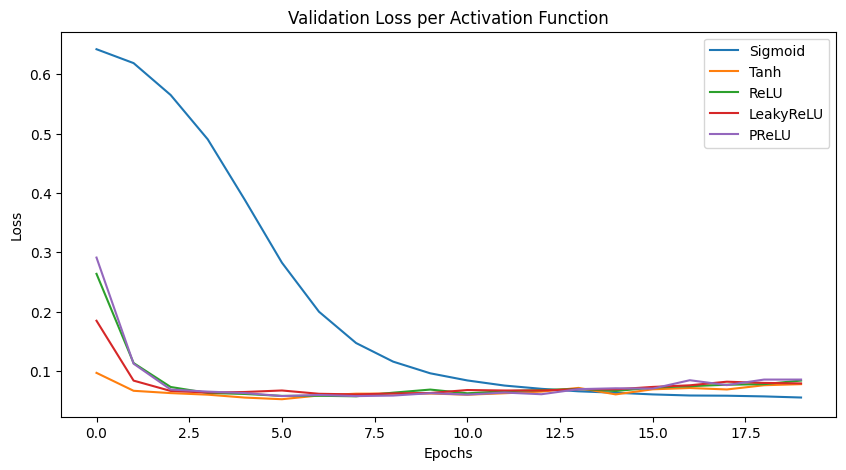

In [ ]:
# Accuracy
plt.figure(figsize=(10,5))
for name in results:
    plt.plot(results[name]['val_accuracy'], label=f'{name}')
plt.title('Validation Accuracy per Activation Function')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.figure(figsize=(10,5))
for name in results:
    plt.plot(results[name]['val_loss'], label=f'{name}')
plt.title('Validation Loss per Activation Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

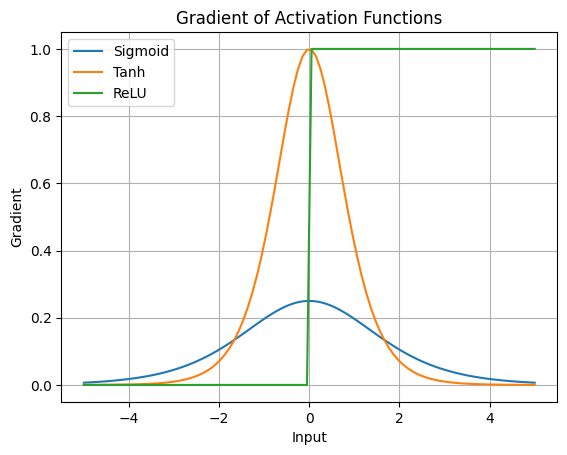

In [ ]:
# Vanishing Gradient Demo with Sigmoid,tanh and relu
layer_outputs = []
layer_inputs = tf.constant(np.linspace(-5, 5, 100))

for act_func, name in [(sigmoid, "Sigmoid"), (tanh, "Tanh"), (relu, "ReLU")]:
    with tf.GradientTape() as tape:
        tape.watch(layer_inputs)
        y = act_func(layer_inputs)
    dy_dx = tape.gradient(y, layer_inputs)
    plt.plot(layer_inputs.numpy(), dy_dx.numpy(), label=name)

plt.title('Gradient of Activation Functions')
plt.xlabel('Input')
plt.ylabel('Gradient')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Depth Experiment
depths = [2, 4, 6, 8, 10]
depth_results = {}
accuracy_list = []
loss_list = []
for depth in depths:
    print(f"Training with depth {depth}...")
    model = create_dnn('relu', depth)  # lowercase 'relu'
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)
    depth_results[depth] = history.history

Training with depth 2...
Training with depth 4...
Training with depth 6...
Training with depth 8...
Training with depth 10...


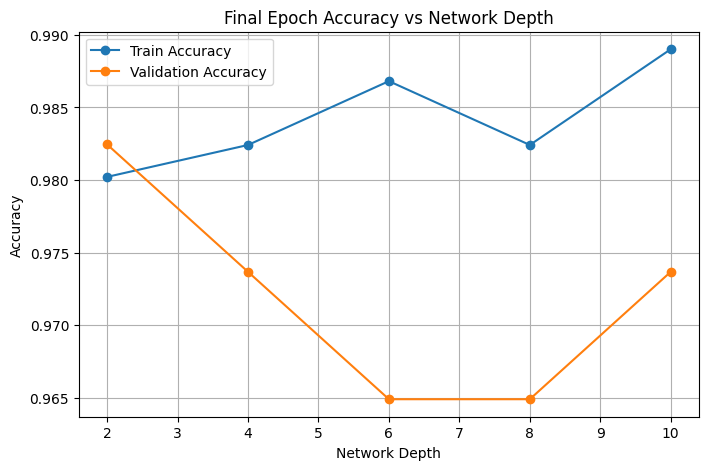

In [ ]:
# Extract final training accuracy and validation accuracy for each depth
train_accuracies = [depth_results[d]['accuracy'][-1] for d in depths]
val_accuracies = [depth_results[d]['val_accuracy'][-1] for d in depths]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(depths, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(depths, val_accuracies, marker='o', label='Validation Accuracy')
plt.xlabel("Network Depth")
plt.ylabel("Accuracy")
plt.title("Final Epoch Accuracy vs Network Depth")
plt.legend()
plt.grid(True)
plt.show()


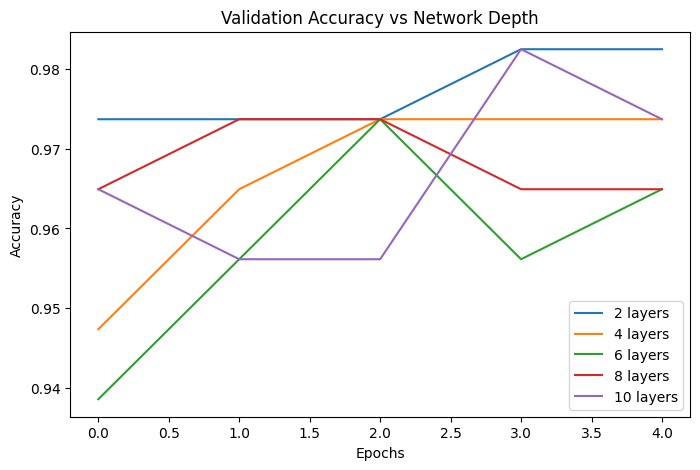

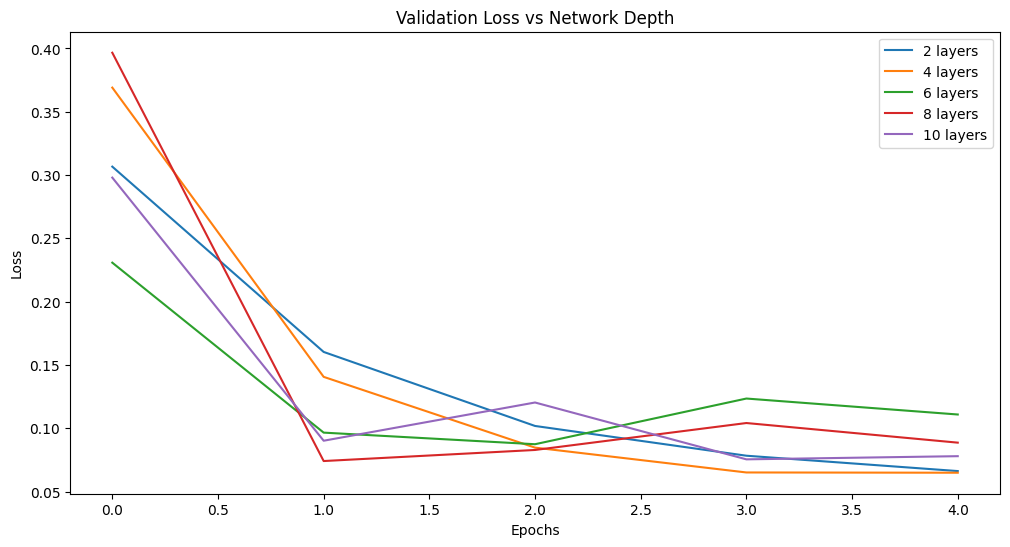

In [ ]:
# Accuracy vs Depth
plt.figure(figsize=(8, 5))
for depth in depth_results:
    plt.plot(depth_results[depth]['val_accuracy'], label=f'{depth} layers')
plt.title('Validation Accuracy vs Network Depth')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss vs Depth
plt.figure(figsize=(12, 6))
for depth in depth_results:
    plt.plot(depth_results[depth]['val_loss'], label=f'{depth} layers')
plt.title('Validation Loss vs Network Depth')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()